In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.rsot.problem import RSOT, EntropicRSOT
from src.rsot.sinkhorn import calc_U, calc_k_formula, robust_semisinkhorn_eps
from src.utils import norm_inf

import time

In [2]:
# Dimension
n = 100

# Regularization
tau = np.float64(1.0)

In [3]:
np.random.seed(3698)

# Cost matrix
C = np.random.uniform(1.0, 50.0, (n, n)).astype(np.float64)

# Marginal vectors
a = np.random.uniform(0.1, 1.0, n).astype(np.float64)
b = np.random.uniform(0.1, 1.0, n).astype(np.float64)

a = a / a.sum()
b = b / b.sum()

# Varying $\epsilon$

In [4]:
rsot = RSOT(C, a, b, tau)

In [5]:
X_hat = rsot.optimize_f('SCS')

f_hat = rsot.calc_f(X_hat)

print('Optimal:', f_hat)

Optimal: 1.7833128682547006


In [6]:
# Number of eps
neps = 20

# Epsilons
eps_arr = np.logspace(start=-1, stop=-5, num=neps).astype(np.float64)

Epsilon 0: 0.1
0 1.0000000000000002
1000 1.7833088020720553
2000 1.783312783604971
2050 1.7833127968618823


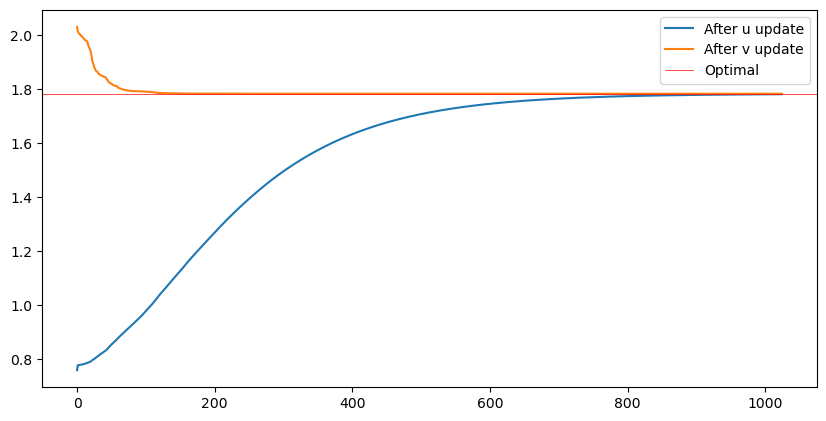

Time elapsed: 3.562129497528076
Epsilon 1: 0.06158482110660264
0 1.0000000000000002
1000 1.7832939675693902
2000 1.783289622706205
2136 1.7832897672270396


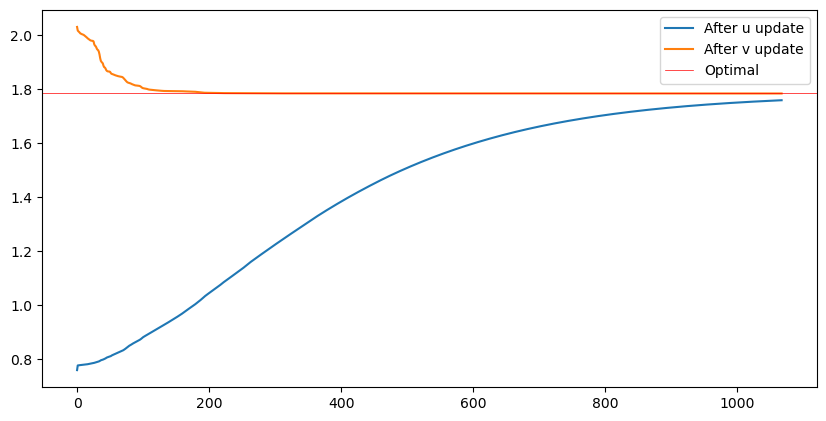

Time elapsed: 2.0705854892730713
Epsilon 2: 0.0379269019073225
0 1.0000000000000002
1000 1.7837212232399255
2000 1.783284802265517
2262 1.7832809407363193


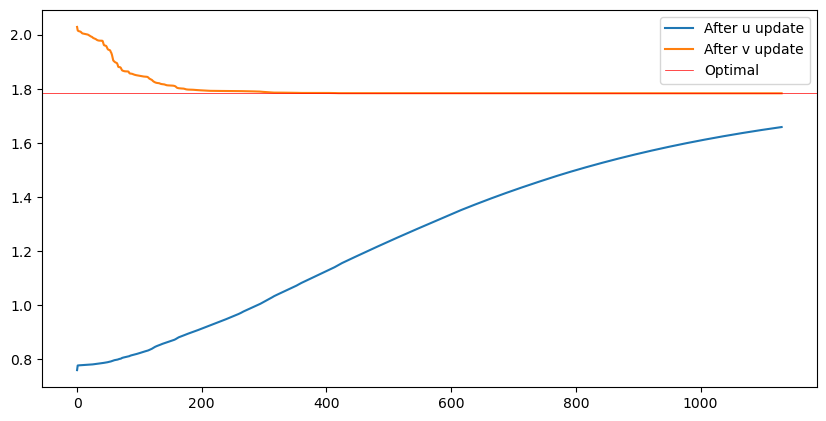

Time elapsed: 2.93192720413208
Epsilon 3: 0.023357214690901226
0 1.0000000000000002
1000 1.787363092375862
2000 1.7834520043895725
2520 1.783299860230351


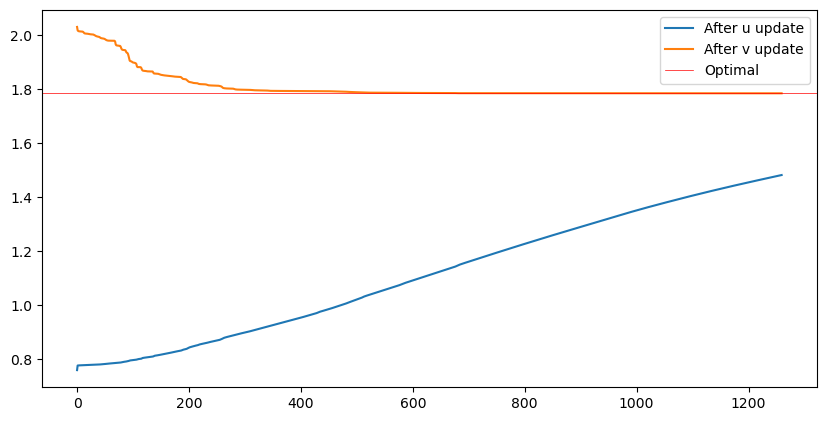

Time elapsed: 2.2884204387664795
Epsilon 4: 0.01438449888287663
0 1.0000000000000002
1000 1.7964854089971016
2000 1.7845383343780723
2918 1.7837185024347002


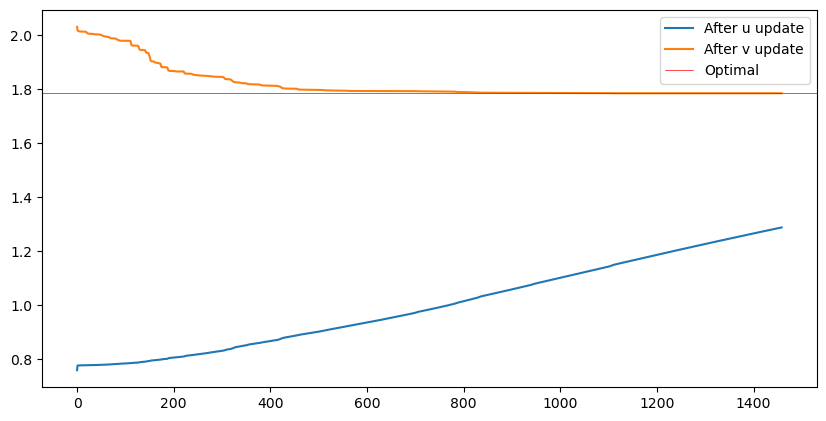

Time elapsed: 1.5350308418273926
Epsilon 5: 0.008858667904100831
0 1.0000000000000002
1000 1.8360030639436367
2000 1.7918726184486256
3000 1.785204841965475
3848 1.7837736815492786


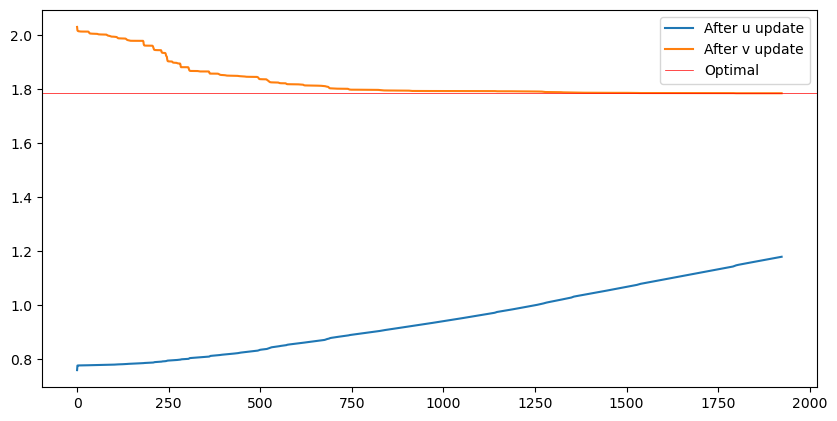

Time elapsed: 2.000277519226074
Epsilon 6: 0.00545559478116852
0 1.0000000000000002
1000 1.8669026383800218
2000 1.815927360235773
3000 1.7921144740743715
4000 1.7905439829414058
5000 1.7845594589092388
6000 1.7837746177084801
6140 1.7837746175631586


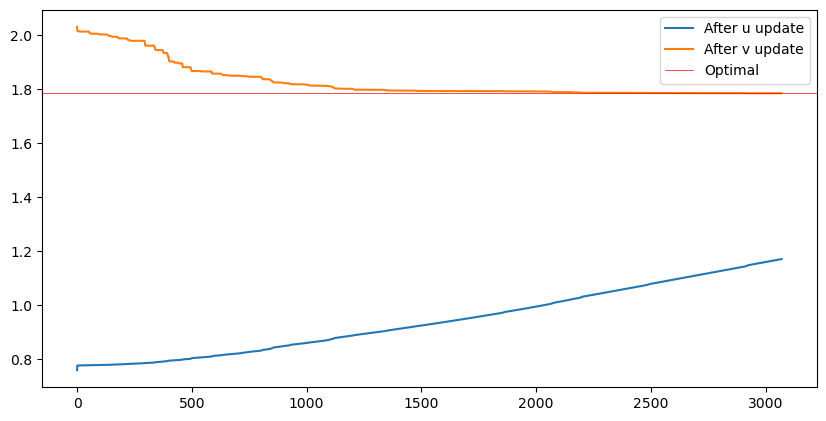

Time elapsed: 3.9849607944488525
Epsilon 7: 0.003359818286283781
0 1.0000000000000002
1000 1.9600269414970581
2000 1.8564564729457471
3000 1.820792312457545
4000 1.796846533505659
5000 1.792029341710561
6000 1.7918648208163046
7000 1.787156127309923
8000 1.7852030886705939
9000 1.784537798348154
9132 1.7845377983476345


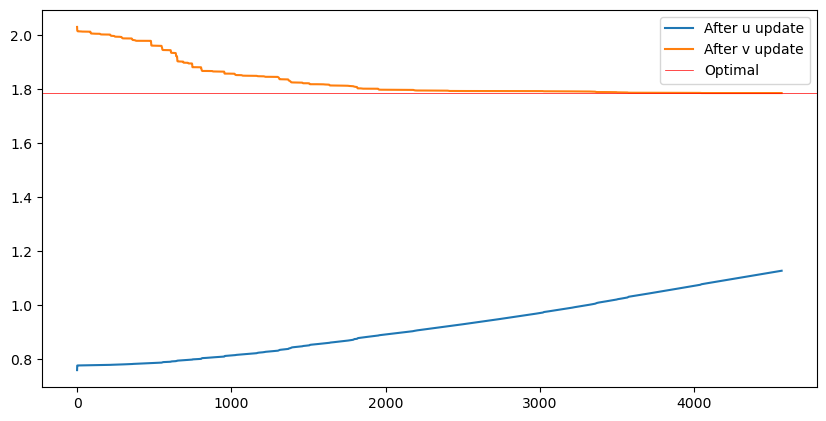

Time elapsed: 3.654536485671997
Epsilon 8: 0.00206913808111479
0 1.0000000000000002
1000 1.9869353397893927
2000 1.9332625668715684
3000 1.8645035787395914
4000 1.8446313707897808
5000 1.8171886589987771
6000 1.801098249380613
7000 1.7965106340165533
8000 1.7920291540326136
9000 1.791864823276688
10000 1.791022439708955
11000 1.7881171238690394
12000 1.7857072791572854
13000 1.7852030706989408
14000 1.7845377846359671
14460 1.7845377846361863


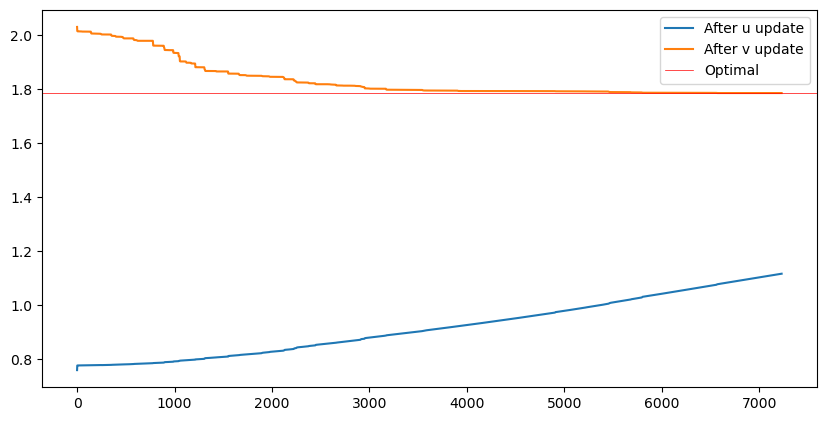

Time elapsed: 5.128042459487915
Epsilon 9: 0.0012742749857031347
0 1.0000000000000002
1000 2.001489058903057
2000 1.979853045863977
3000 1.9438203616594438
4000 1.8802481064200227
5000 1.8645035778649728
6000 1.8486845650132113
7000 1.8355872975967997
8000 1.8171886626772318
9000 1.8118572436977691
10000 1.8006723074484472
11000 1.7965106234335035
12000 1.7938345273351215
13000 1.7920289751455667
14000 1.7918649029719456
15000 1.791864780385525
16000 1.7910226613375295
17000 1.790543888842159
18000 1.7881164482279996
19000 1.785707285882913
20000 1.7857072721139367
21000 1.785203065408687
22000 1.7845377794149715
23000 1.784537779414776
23328 1.7845377794148298


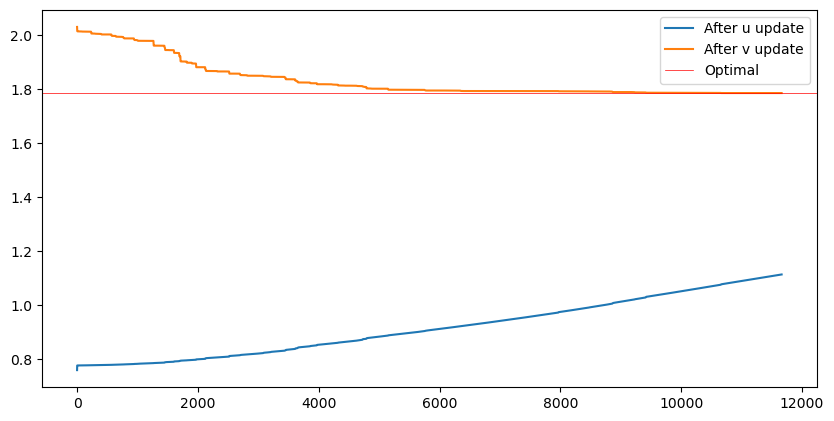

Time elapsed: 6.569496154785156
Epsilon 10: 0.0007847599703514615
0 1.0000000000000002
1000 2.0041845478970934
2000 1.9961864049083031
3000 1.9869350578114158
4000 1.977996531359111
5000 1.9435897077370696
6000 1.8968903780088777
7000 1.866247657681356
8000 1.8645035775329077
9000 1.850927497280295
10000 1.8484928008920891
11000 1.8446313400484937
12000 1.8236913383908453
13000 1.8171886549769252
14000 1.8157393553140182
15000 1.8118554216734175
16000 1.8006722858400448
17000 1.7968460442535488
18000 1.7965106172533556
19000 1.7938923892924747
20000 1.793834351830132
21000 1.7920289641369314
22000 1.792028963687143
23000 1.7918647921715065
24000 1.791864773246917
25000 1.7918647701804085
26000 1.7910224299345163
27000 1.7910224228246956
28000 1.790543884732833
29000 1.7881164463054529
30000 1.7869722888280208
31000 1.785707269473406
32000 1.7857072694128506
33000 1.7852031040228766
34000 1.7852030634381804
35000 1.7845377774301696
36000 1.7845377774311728
37000 1.7845377774307094
38000

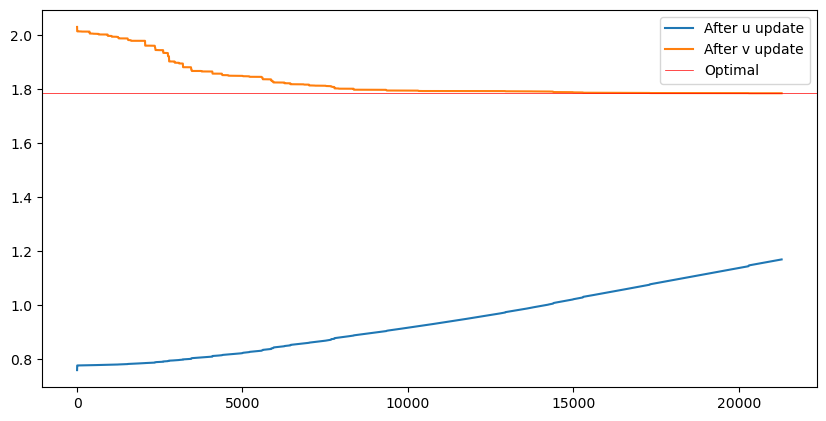

Time elapsed: 13.050055742263794
Epsilon 11: 0.0004832930238571752
0 1.0000000000000002
1000 2.0122008524497974
2000 2.0041844246220086
3000 2.0011611522229247
4000 1.9923117448936523
5000 1.9822021521529525
6000 1.9779965312852021
7000 1.9600138054602567
8000 1.9438203613785683
9000 1.9207815042356189
10000 1.8968415587041838
11000 1.8802481059559604
12000 1.8662476575574014
13000 1.864503577407632
14000 1.8564564691409686
15000 1.8486847453082784
16000 1.8486845561601075
17000 1.8446313398054575
18000 1.844631339774545
19000 1.8355863912918073
20000 1.8236912617427203
21000 1.8171886579340126
22000 1.8171886545364757
23000 1.812604870841141
24000 1.8118569847100068
25000 1.8085563267004288
26000 1.8006722528743064
27000 1.8006722414472114
28000 1.7968460397943875
29000 1.796510615577453
30000 1.7965106154242736
31000 1.7938923695098334
32000 1.7938343505514078
33000 1.7935213175626759
34000 1.7920289629015174
35000 1.7920289628966701
36000 1.79202896264438
37000 1.7918647842971087
38

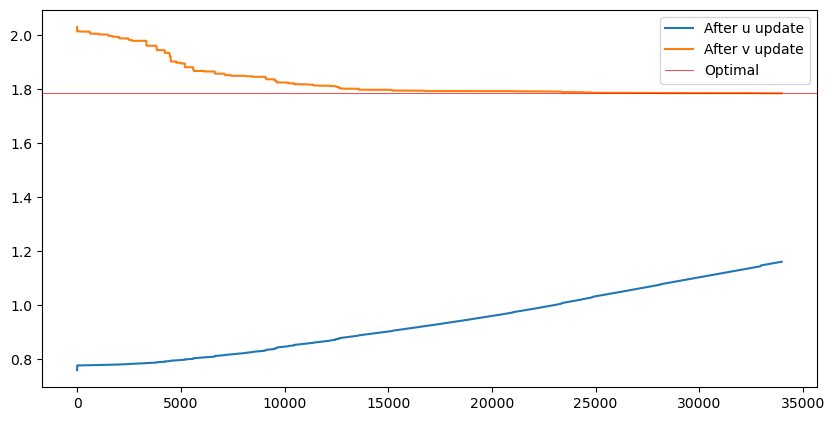

Time elapsed: 18.004889011383057
Epsilon 12: 0.00029763514416313193
0 1.0000000000000002
1000 2.012200852180081
2000 2.0090066241097975
3000 2.0041844244935016
4000 2.0014890561255
5000 1.9961864060643215
6000 1.993179104378676
7000 1.9869350577272464
8000 1.986935057725109
9000 1.9779965312572934
10000 1.977996531260278
11000 1.9600139239083854
12000 1.960013805043384
13000 1.9438203613344323
14000 1.9332550490001241
15000 1.9015175380439868
16000 1.8968903778377957
17000 1.8802481059048286
18000 1.8802481059048872
19000 1.866247657506669
20000 1.864503577360915
21000 1.8645035773606486
22000 1.856456469089778
23000 1.8564564690910035
24000 1.8509274926200145
25000 1.8486845560694918
26000 1.8486845560519685
27000 1.8467705310493108
28000 1.8446313396694265
29000 1.844631339669581
30000 1.8355863911639954
31000 1.8306744336394445
32000 1.8236912615892054
33000 1.8236912615893477
34000 1.8185915330004339
35000 1.817188654376309
36000 1.8171886543770102
37000 1.8126512442426002
38000 1.

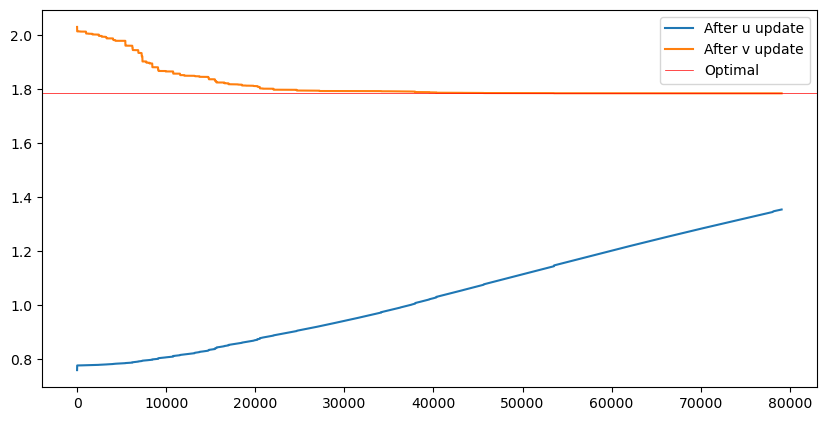

Time elapsed: 43.32834339141846
Epsilon 13: 0.00018329807108324376
0 1.0000000000000002
1000 2.012917866699447
2000 2.012200851324335
3000 2.01220085131029
4000 2.005008214517193
5000 2.0041844244529385
6000 2.0014890560859016
7000 2.001489056081137
8000 1.9961865127815488
9000 1.9931791065142312
10000 1.9931791043669702
11000 1.9869350577151834
12000 1.9869350577193958
13000 1.9869350577079183
14000 1.977996533163881
15000 1.977996531249264
16000 1.9779965312539018
17000 1.9779965312447814
18000 1.9600138050621099
19000 1.9600138050327642
20000 1.9600138050365177
21000 1.9438203613208849
22000 1.9433800961747394
23000 1.9332550489786877
24000 1.9015175380284313
25000 1.901517538025089
26000 1.8968903778228914
27000 1.894122232690758
28000 1.8802481058831386
29000 1.8802481058847458
30000 1.8662476574923272
31000 1.866247657491699
32000 1.8662476574915419
33000 1.864503577343196
34000 1.8645035773403582
35000 1.8645035773412335
36000 1.8564564690737009
37000 1.856456469075849
38000 1.8

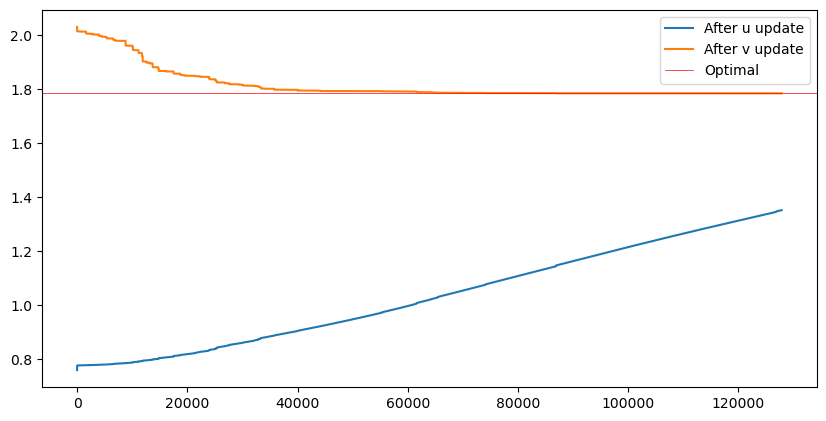

Time elapsed: 62.226948499679565
Epsilon 14: 0.00011288378916846895
0 1.0000000000000002
1000 2.012917866623622
2000 2.012200851308176
3000 2.0122008512986094
4000 2.012200851298463
5000 2.0122008512910163
6000 2.0050082144987122
7000 2.004184424443088
8000 2.00418442443336
9000 2.0041844213933273
10000 2.001489056064839
11000 2.0014890560695964
12000 2.001489056059571
13000 1.9961864048781153
14000 1.9961864047323588
15000 1.9931791043666858
16000 1.9931791043776188
17000 1.9923117448573175
18000 1.986935057715276
19000 1.9869350577111264
20000 1.9869350577140004
21000 1.9869350577076235
22000 1.9808373437183993
23000 1.9779965312417023
24000 1.9779965312419567
25000 1.9779965312368728
26000 1.9779965312498833
27000 1.9779965312423242
28000 1.9779965312492
29000 1.9600138050367049
30000 1.9600138050253415
31000 1.9600138050270162
32000 1.9600138050245444
33000 1.9438203613026637
34000 1.943820361298086
35000 1.9433800961572794
36000 1.9433800961676075
37000 1.9332550489648783
38000 1.

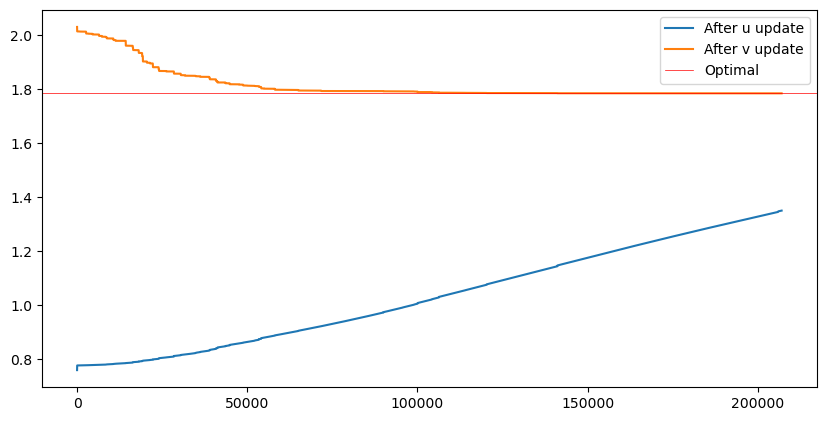

Time elapsed: 109.0342926979065
Epsilon 15: 6.951927961775606e-05
0 1.0000000000000002
1000 2.0129178665825327
2000 2.0129178659639226
3000 2.0129178659591878
4000 2.012200851287539
5000 2.0122008512863565
6000 2.0122008512772473
7000 2.012200851287818
8000 2.012200851292593
9000 2.0050082144979933
10000 2.005008214486028
11000 2.0041916060455636
12000 2.0041844244358624
13000 2.0041844244227534
14000 2.004184424435672
15000 2.001489056058004
16000 2.001489056050675
17000 2.0014890560513674
18000 2.00148905605161
19000 2.0014890560583756
20000 2.001489056074254
21000 1.9961864057713048
22000 1.9961864047279536
23000 1.9961864047394435
24000 1.993179104363762
25000 1.993179104378899
26000 1.9931791043624423
27000 1.9931791043705454
28000 1.9893260894894964
29000 1.9869350577204292
30000 1.9869350577061091
31000 1.9869350577147666
32000 1.9869350577096707
33000 1.9869350577040328
34000 1.986935057710755
35000 1.9808373437364857
36000 1.9808373437208278
37000 1.9779965312526322
38000 1.97

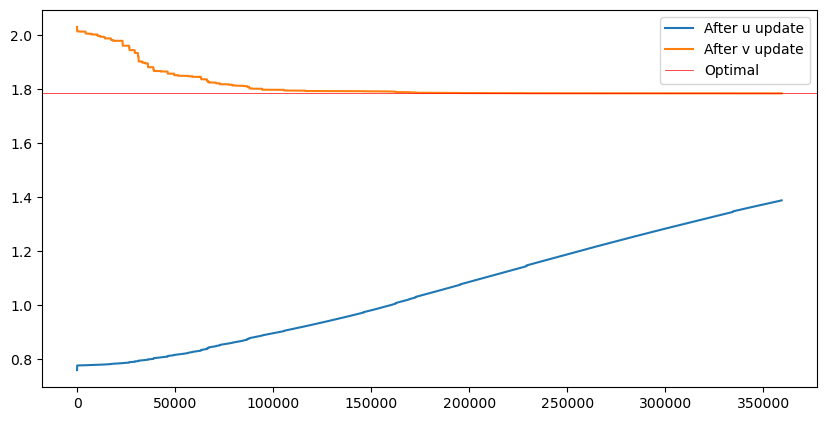

Time elapsed: 136.2515254020691
Epsilon 16: 4.281332398719396e-05
0 1.0000000000000002
1000 2.0129178665566387
2000 2.0129178659561395
3000 2.0129178659788
4000 2.012917865950692
5000 2.0129170253274005
6000 2.0122008513004683
7000 2.012200851290939
8000 2.01220085128934
9000 2.012200851296904
10000 2.012200851302997
11000 2.0122008512777536
12000 2.012200851303474
13000 2.0122008512813494
14000 2.005008214496978
15000 2.0050082144844215
16000 2.005008214480009
17000 2.0050082144982846
18000 2.0041844244247935
19000 2.004184424429515
20000 2.004184424425386
21000 2.0041844244174705
22000 2.0041844244076326
23000 2.004184424414401
24000 2.001489056033392
25000 2.0014890560903025
26000 2.0014890560583503
27000 2.001489056057687
28000 2.0014890560673813
29000 2.0014890560644165
30000 2.001489056058039
31000 2.001489056049906
32000 2.001489056056892
33000 2.0014890560334666
34000 1.9961864138321654
35000 1.9961864047025184
36000 1.9961864047341
37000 1.9961864047208784
38000 1.996186404738

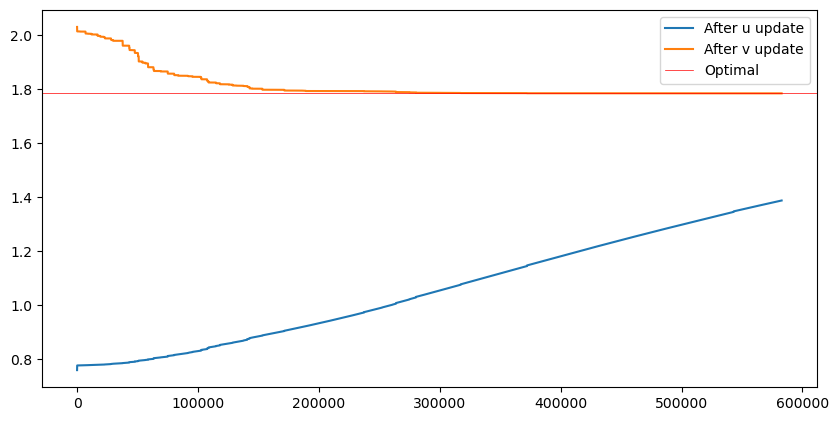

Time elapsed: 351.51567673683167
Epsilon 17: 2.6366508987303607e-05
0 1.0000000000000002
1000 2.0129178665700613
2000 2.012917865940266
3000 2.012917865985071
4000 2.012917865931679
5000 2.012917865972862
6000 2.0129178659576272
7000 2.012917866000643
8000 2.012917866002144
9000 2.012200851327124
10000 2.0122008513207925
11000 2.0122008512970058
12000 2.01220085128925
13000 2.0122008513034615
14000 2.012200851273313
15000 2.0122008512848506
16000 2.012200851282267
17000 2.0122008513097533
18000 2.0122008512792444
19000 2.0122008513352583
20000 2.0122008512852725
21000 2.0122008512772123
22000 2.012200851278174
23000 2.0050082145068915
24000 2.005008214508941
25000 2.005008214474765
26000 2.0050082145004113
27000 2.0050082144774706
28000 2.00500821448923
29000 2.0041844871514853
30000 2.00418442440007
31000 2.004184424413436
32000 2.004184424402889
33000 2.0041844244317586
34000 2.0041844244120743
35000 2.0041844244220544
36000 2.0041844244304783
37000 2.0041844243903655
38000 2.0041844

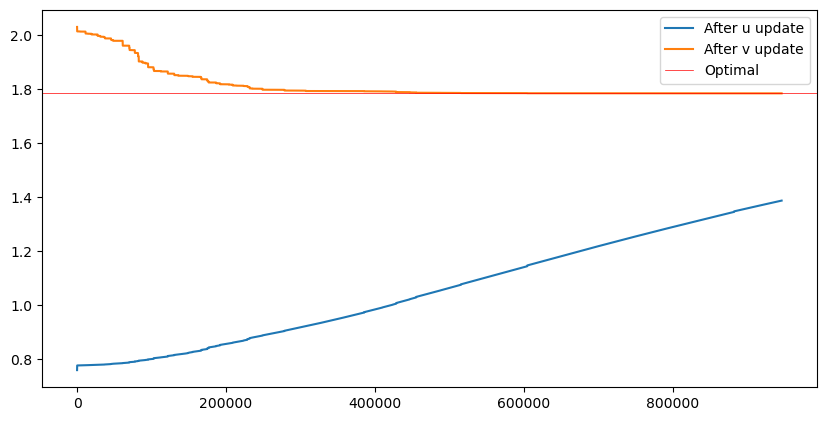

Time elapsed: 432.84586906433105
Epsilon 18: 1.6237767391887242e-05
0 1.0000000000000002
1000 2.0129178665644885
2000 2.0129178659598943
3000 2.0129178659649707
4000 2.0129178659703757
5000 2.0129178658519975
6000 2.0129178660057883
7000 2.0129178660130282
8000 2.0129178659859046
9000 2.0129178659301314
10000 2.012917865964083
11000 2.0129178659565055
12000 2.012917865926682
13000 2.012917865972381
14000 2.012200851249485
15000 2.0122008512959058
16000 2.0122008512418543
17000 2.0122008512662957
18000 2.0122008512587164
19000 2.0122008512942626
20000 2.0122008512744674
21000 2.012200851348767
22000 2.012200851264357
23000 2.0122008513155696
24000 2.0122008512612912
25000 2.0122008512911966
26000 2.012200851255976
27000 2.0122008512918144
28000 2.0122008512988496
29000 2.012200851316269
30000 2.0122008512334295
31000 2.0122008512822838
32000 2.012200851335329
33000 2.0122008513203613
34000 2.012200851286469
35000 2.0122008512375174
36000 2.0122008513063614
37000 2.0050082144417414
38000

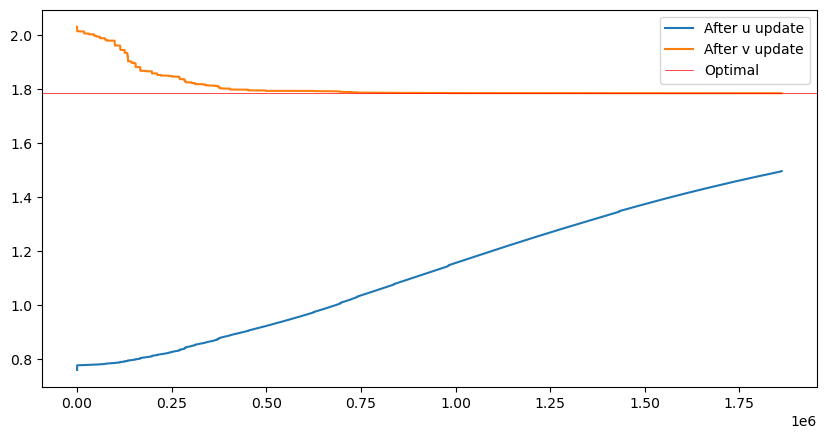

Time elapsed: 1040.6945188045502
Epsilon 19: 1e-05
0 1.0000000000000002
1000 2.012917866481066
2000 2.012917866021752
3000 2.0129178659205778
4000 2.0129178659360507
5000 2.0129178659837645
6000 2.0129178659416698
7000 2.0129178659503726
8000 2.012917865865811
9000 2.012917865874905
10000 2.012917865944565
11000 2.012917865964402
12000 2.0129178660079745
13000 2.0129178659292615
14000 2.0129178659918745
15000 2.0129178660264895
16000 2.012917865896318
17000 2.0129178659726223
18000 2.012917865968202
19000 2.0129178660563176
20000 2.0129178659733995
21000 2.0129178658903633
22000 2.0122008512567566
23000 2.012200851241449
24000 2.012200851268129
25000 2.012200851243579
26000 2.012200851319224
27000 2.0122008513312517
28000 2.0122008512097103
29000 2.012200851241845
30000 2.0122008513693768
31000 2.012200851259838
32000 2.01220085122474
33000 2.0122008512574823
34000 2.012200851150812
35000 2.0122008512993164
36000 2.012200851235593
37000 2.012200851217194
38000 2.0122008513080494
39000 

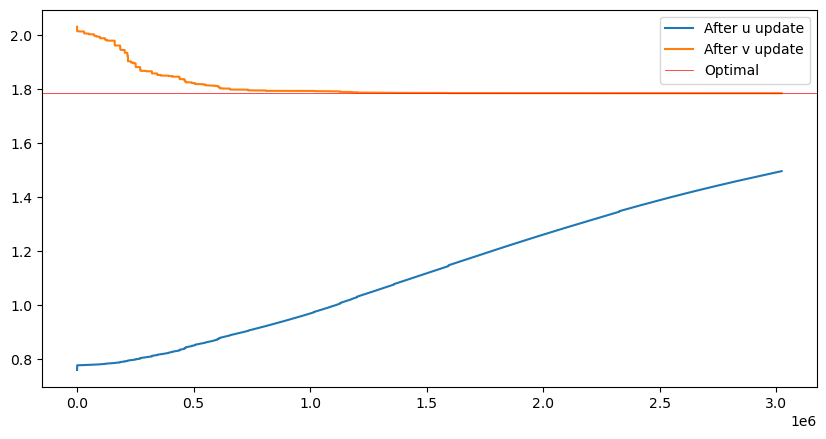

Time elapsed: 945.676894903183


In [7]:
kfs, kcs = np.zeros((2, neps))

for i, eps in enumerate(eps_arr):
    print(f'Epsilon {i}:', eps)
    start = time.time()

    # Entropic regularization parameter
    U = calc_U(rsot, eps)
    eta = eps / U

    # Convert to Entropic Regularized UOT
    ersot = EntropicRSOT(C, a, b, tau, eta)

    # Sinkhorn
    _, log = robust_semisinkhorn_eps(ersot, f_hat, eps, 
                                     patience=1000,
                                     save_uv=False, verbose=True)
    
    # Overview
    plt.figure(figsize=(10, 5), dpi=100)
    plt.plot(log['f'][1::2], label='After u update')
    plt.plot(log['f'][2::2], label='After v update')
    plt.axhline(f_hat, color='red', label='Optimal', linewidth=0.5)
    plt.legend()
    plt.show()

    # Find k
    kfs[i] = calc_k_formula(ersot, eps)
    kcs[i] = len(log['f']) - 2000

    print('Time elapsed:', time.time() - start)
    print('=================')

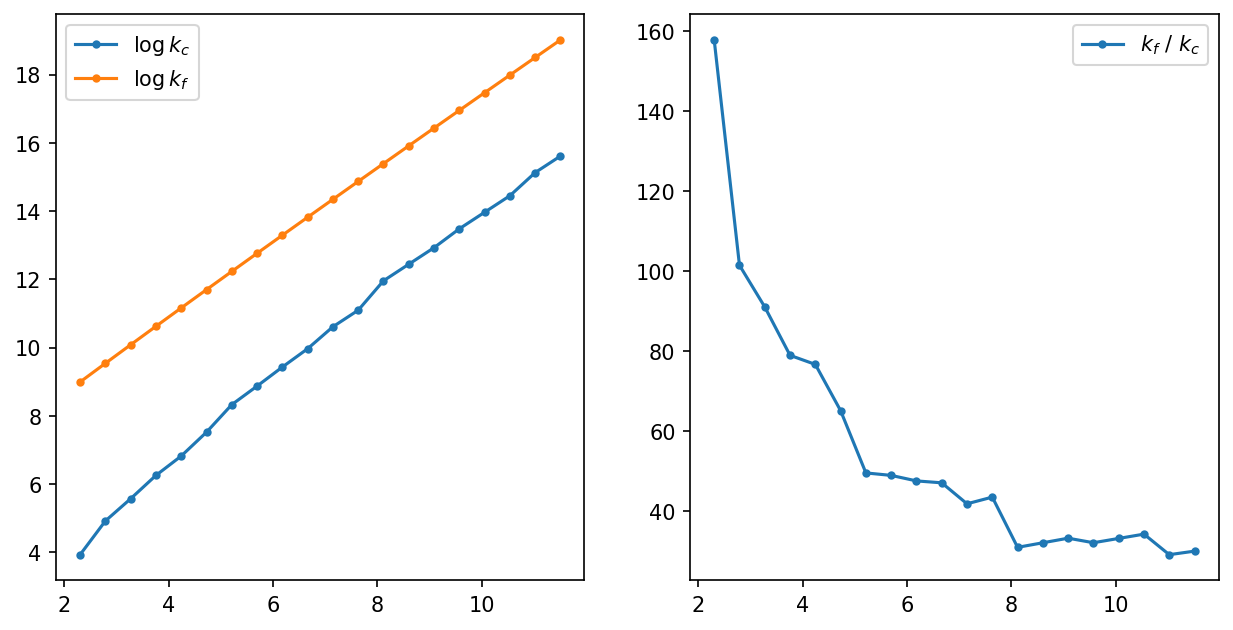

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

ax[0].plot(np.log(1 / eps_arr), np.log(kcs), marker='.', label='$\log k_c$')
ax[0].plot(np.log(1 / eps_arr), np.log(kfs), marker='.', label='$\log k_f$')
ax[0].legend()

ax[1].plot(np.log(1 / eps_arr), kfs / kcs, marker='.', label='$k_f$ / $k_c$')
ax[1].legend()

# Theory checking

Original RSOT problem

In [9]:
rsot = RSOT(C, a, b, tau)

Optimal solution for RSOT

In [10]:
X_hat = rsot.optimize_f('SCS')

f_hat = rsot.calc_f(X_hat)

print('Optimal:', f_hat)

Optimal: 1.7833128682547006


Entropic RSOT problem

In [11]:
# Entropic regularization parameter
eta = np.float64(0.0)

# Convert to Entropic Regularized RSOT
ersot = rsot.entropic_regularize(eta)

Optimal solution for Entropic RSOT (primal)

In [12]:
X_star = ersot.optimize_g('SCS')

f_star = ersot.calc_f(X_star)
g_star = ersot.calc_g(X_star)

print('Optimal:', f_star, g_star)

Optimal: 1.78502959959134 1.78502959959134


Optimal solution for Entropic RSOT (dual)

In [13]:
# u_star, v_star = ersot.optimize_h(solver='SCS')
# X_star_dual = ersot.calc_B(u_star, v_star)

# f_star_dual = ersot.calc_f(X_star_dual)
# g_star_dual = ersot.calc_g(X_star_dual)
# h_star_dual = ersot.calc_h(u_star, v_star)

# print('Optimal:', f_star_dual, g_star_dual)

In [14]:
eps = 0.001

# Entropic regularization parameter
U = calc_U(rsot, eps)
eta = eps / U

# Convert to Entropic Regularized UOT
ersot = rsot.entropic_regularize(eta)

In [15]:
start = time.time()

# Sinkhorn
_, log = robust_semisinkhorn_eps(ersot, f_hat, eps, 
                                 save_uv=True,
                                 patience=1000, verbose=True)

print('Time elapsed:', time.time() - start)

0 1.0000000000000002
1000 2.004183933836871
2000 1.9869413251634482
3000 1.977996531431473
4000 1.9433800964810761
5000 1.8941222330035403
6000 1.8645035776600225
7000 1.8509278202030883
8000 1.8467705317678382
9000 1.8355864114757083
10000 1.8207923518496758
11000 1.8156642594111434
12000 1.8104716174307556
13000 1.8006722582916133
14000 1.7965106196905647
15000 1.7938910603961267
16000 1.7934864887688613
17000 1.7920289644816074
18000 1.7918648138742512
19000 1.7918647759163393
20000 1.7918647716997982
21000 1.791022424633093
22000 1.7905438862199436
23000 1.7881164455041583
24000 1.7859869785934277
25000 1.7857072704983077
26000 1.785203074329452
27000 1.785203064188234
28000 1.7845377781868454
29000 1.7845377781873717
30000 1.7845377781876919
31000 1.7845377781863985
32000 1.7837745608007276
33000 1.78377456080089
33850 1.7837745608012503
Time elapsed: 4.947722434997559


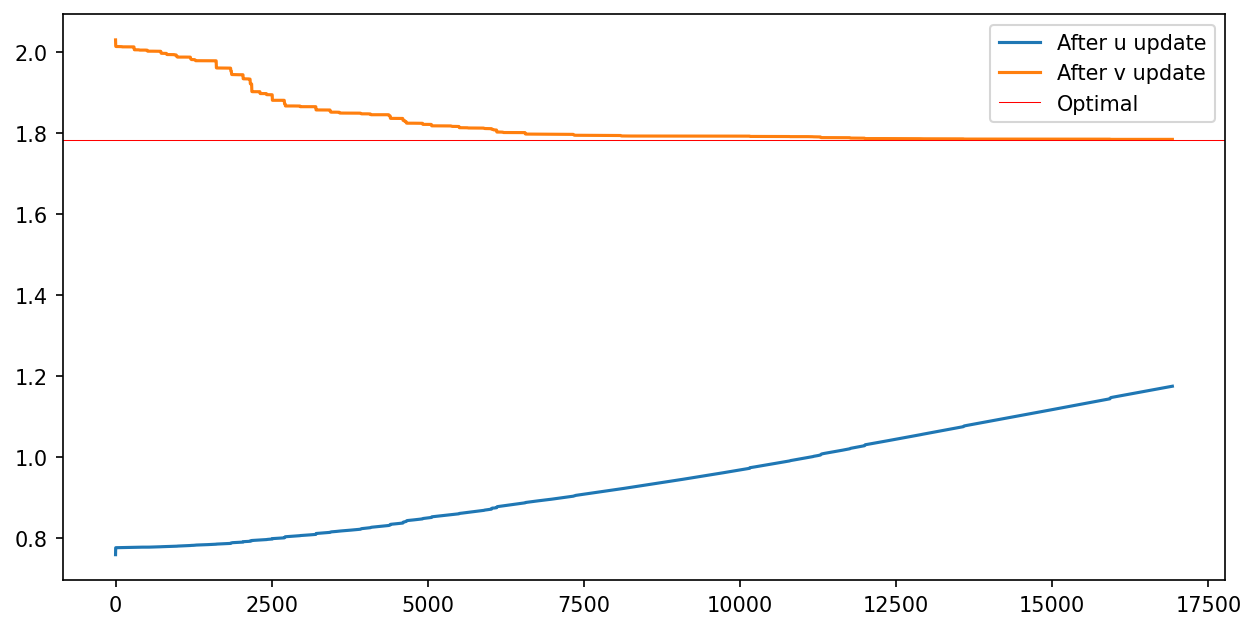

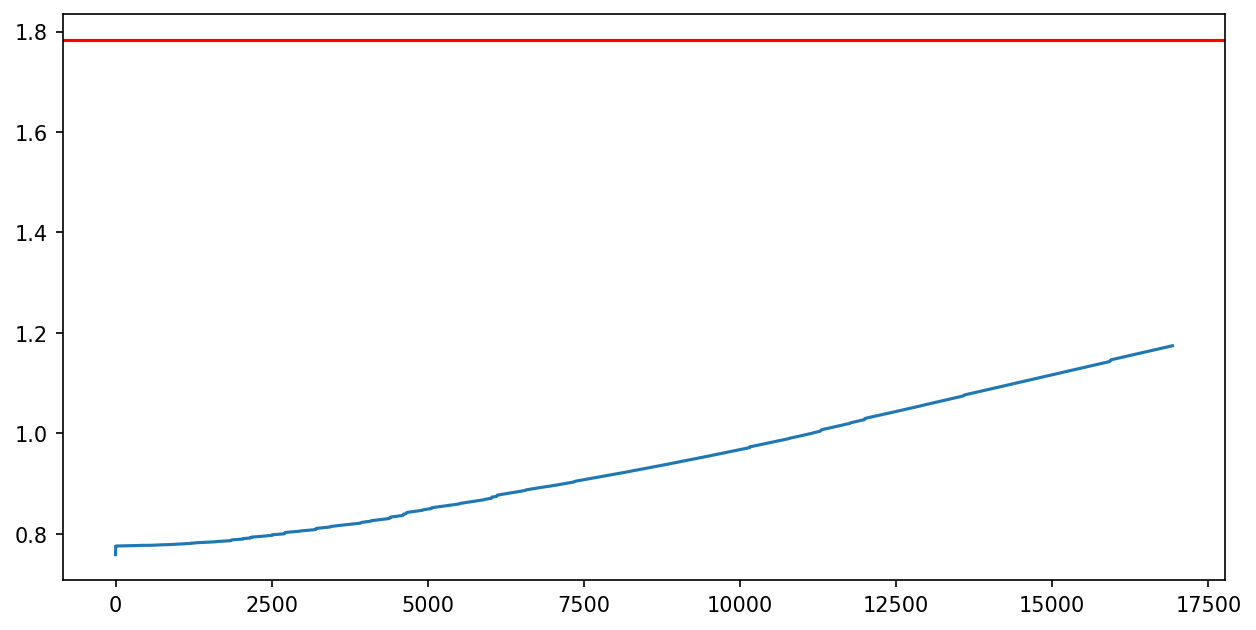

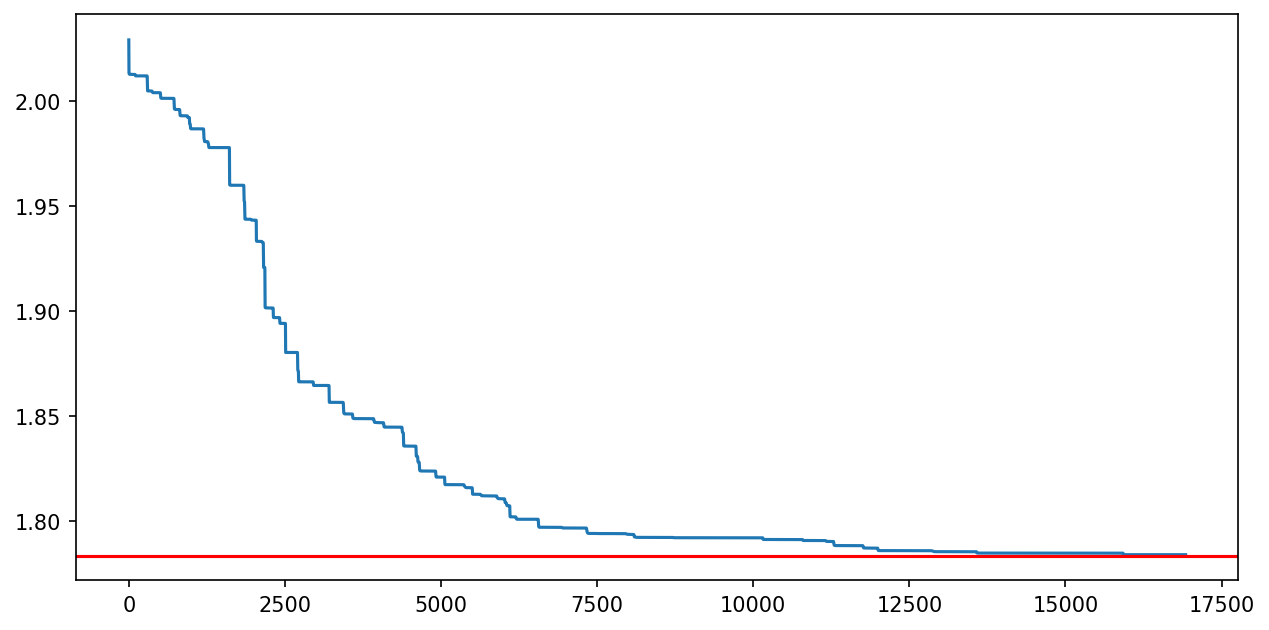

In [20]:
# Overview
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(log['f'][1::2], label='After u update')
plt.plot(log['f'][2::2], label='After v update')
plt.axhline(f_hat, color='red', label='Optimal', linewidth=0.5)
plt.legend()
plt.show()

# After u update
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(log['f'][1::2])
plt.axhline(f_hat, color='red')
plt.show()

# After v update
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(log['f'][2::2])
plt.axhline(f_hat, color='red')
plt.show()

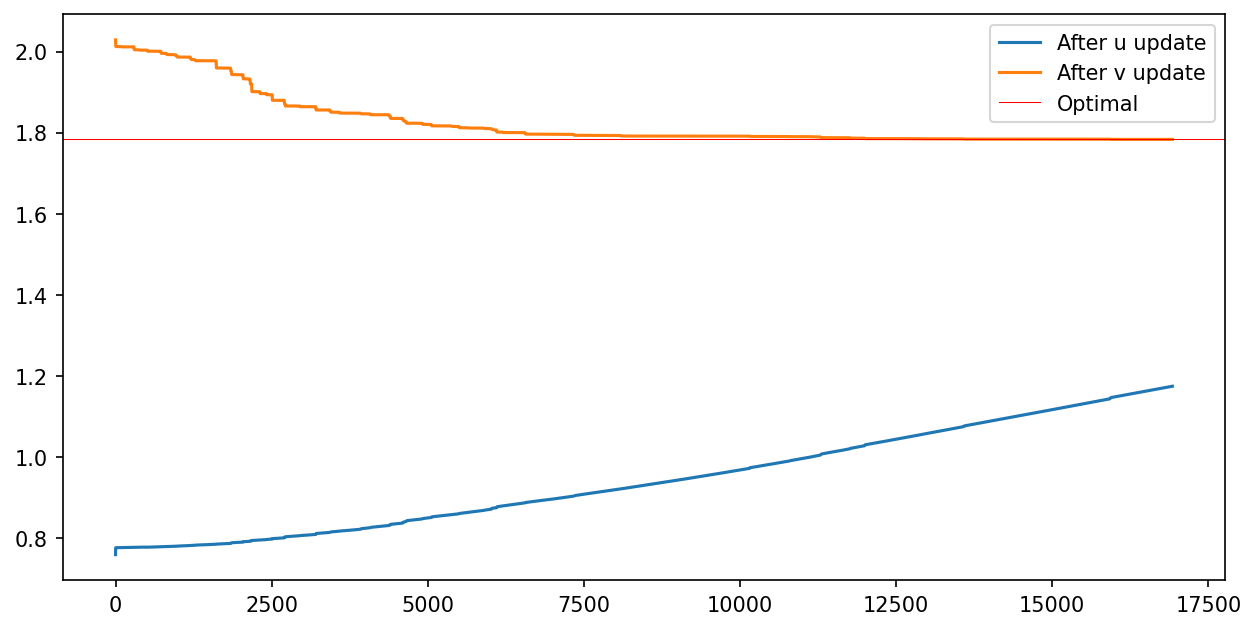

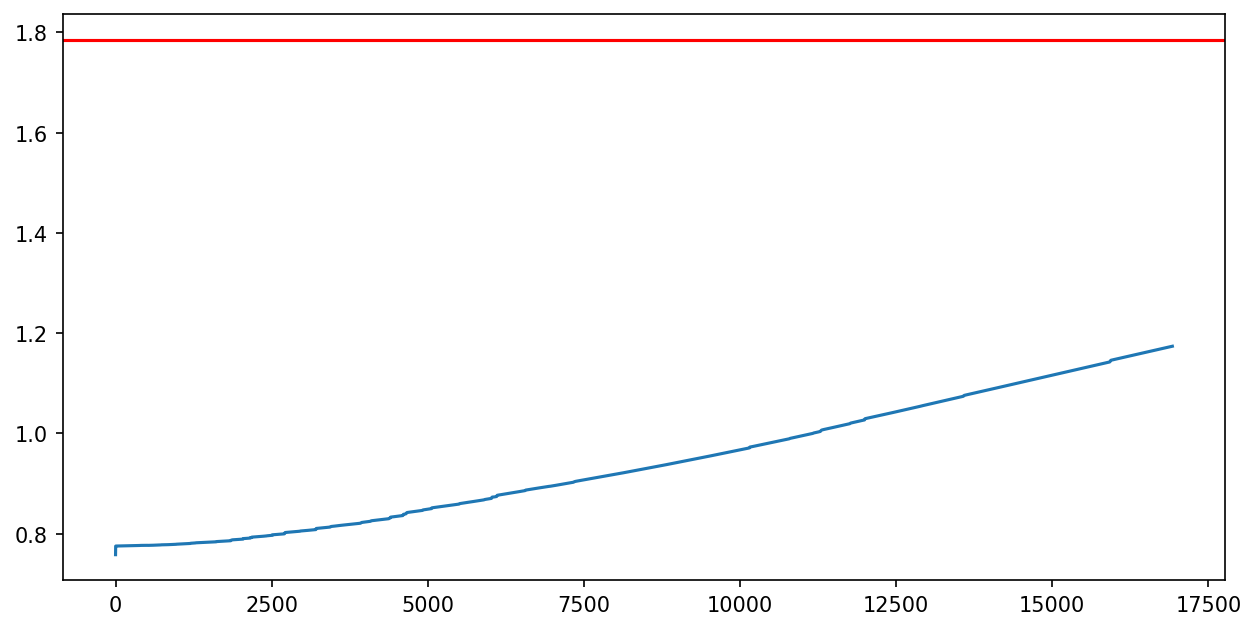

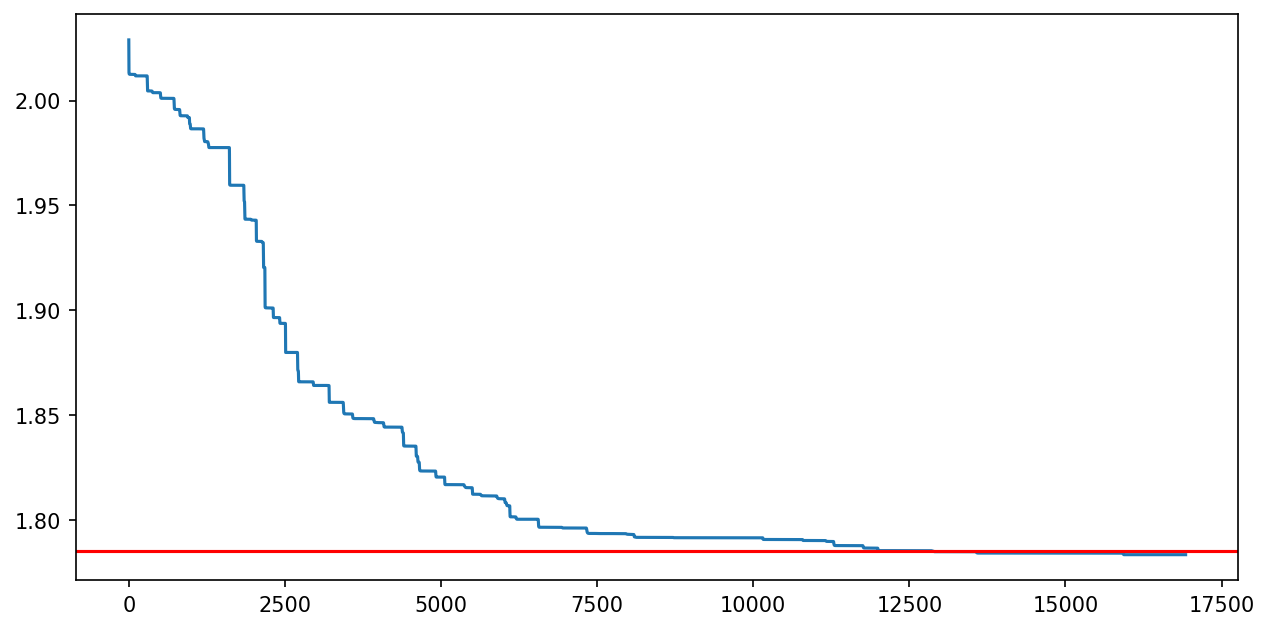

In [21]:
y = []

for uk, vk in zip(log['u'], log['v']):
    Xk = ersot.calc_B(uk, vk)
    
    y.append(ersot.calc_g(Xk))

# Overview
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[1::2], label='After u update')
plt.plot(y[2::2], label='After v update')
plt.axhline(g_star, color='red', label='Optimal', linewidth=0.5)
plt.legend()
plt.show()

# Each u update
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[1::2])
plt.axhline(g_star, color='red')
plt.show()

# Each v update
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[2::2])
plt.axhline(g_star, color='red')
plt.show()

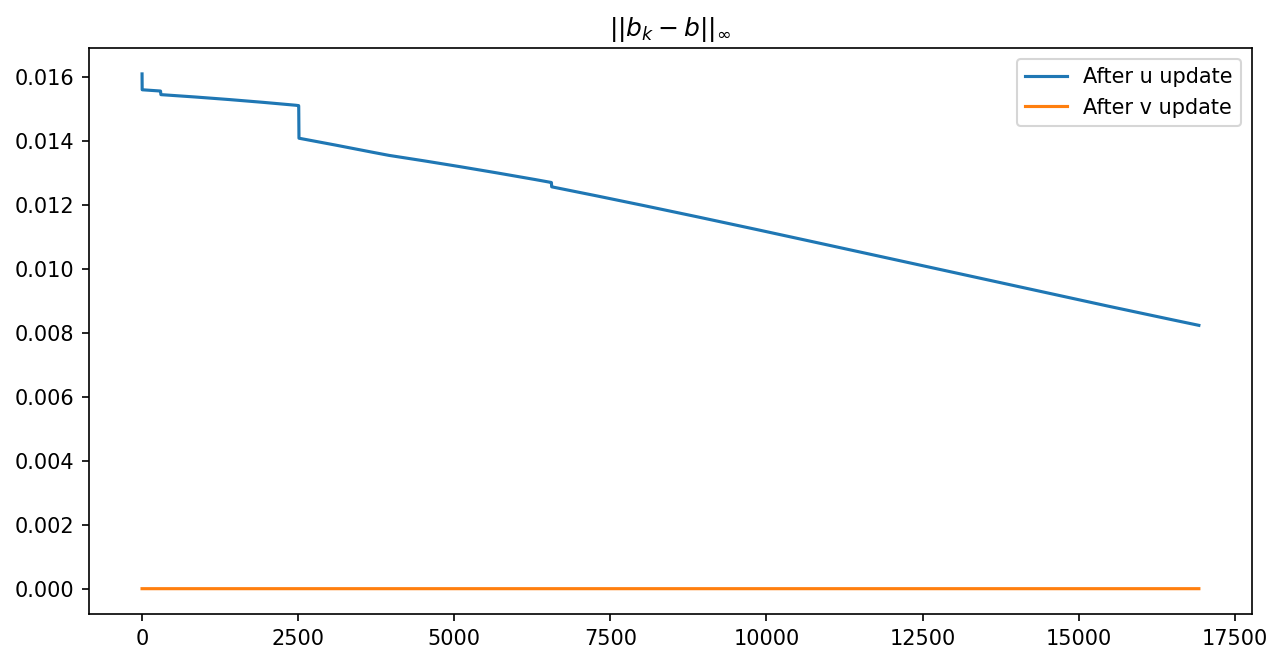

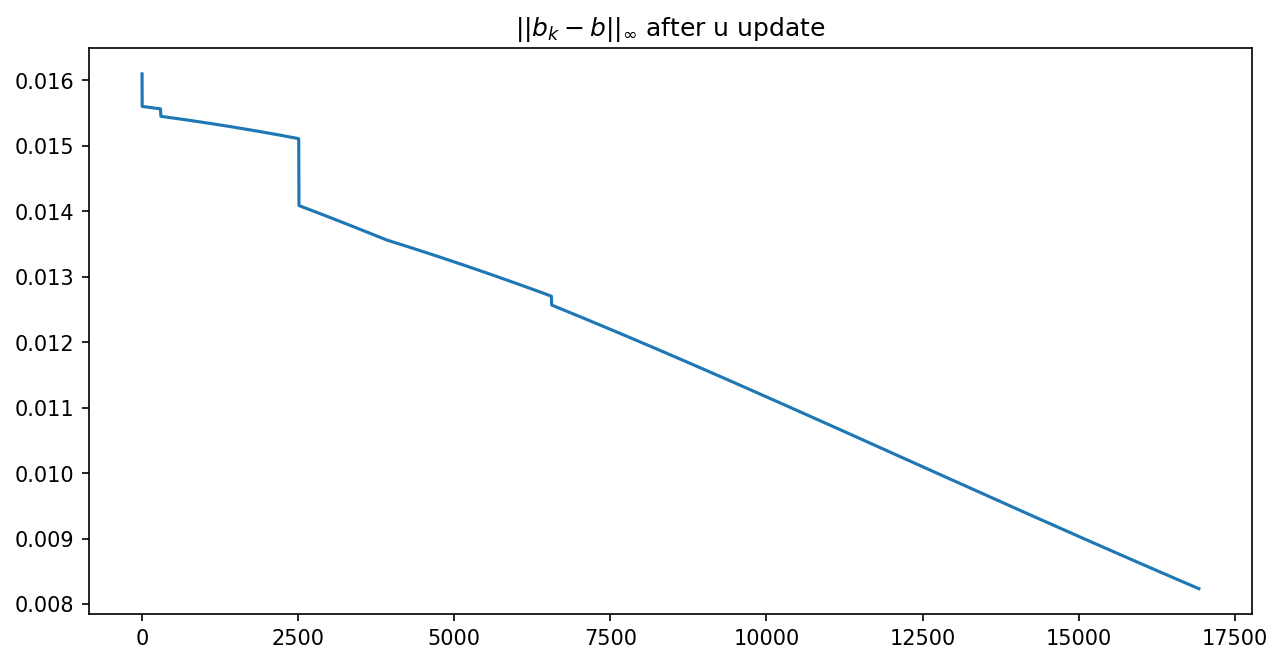

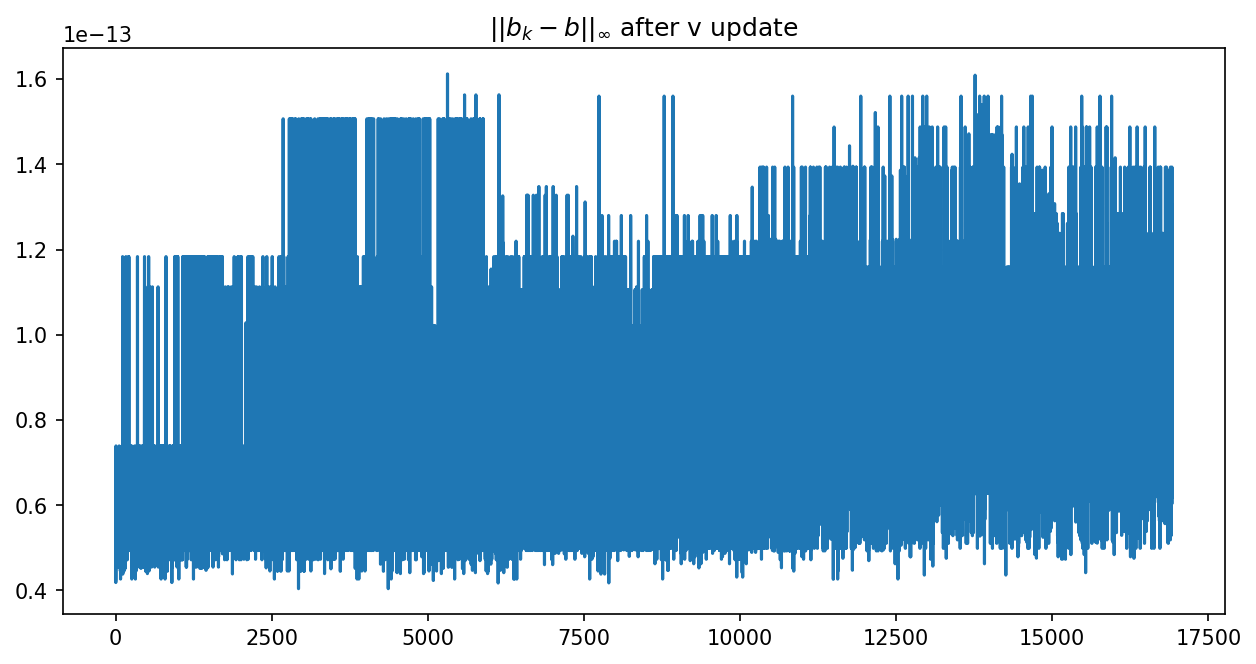

In [18]:
y = []

for uk, vk in zip(log['u'], log['v']):
    Xk = ersot.calc_B(uk, vk)

    bk = Xk.sum(0)

    y.append(norm_inf(bk - ersot.b))

# Overview
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[1::2], label='After u update')
plt.plot(y[2::2], label='After v update')
plt.title('$||b_k - b||_\infty$')
plt.legend()
plt.show()

# Each u update
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[1::2])
plt.title('$||b_k - b||_\infty$ after u update')
plt.show()

# Each v update
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[2::2])
plt.title('$||b_k - b||_\infty$ after v update')
plt.show()

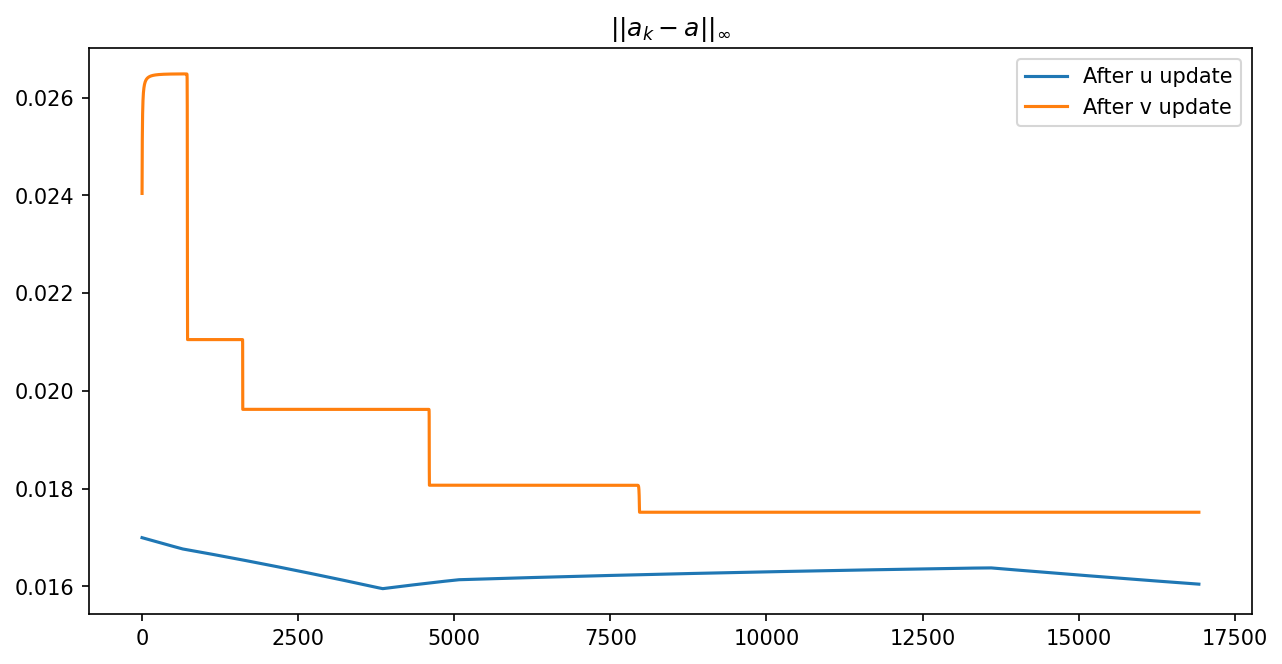

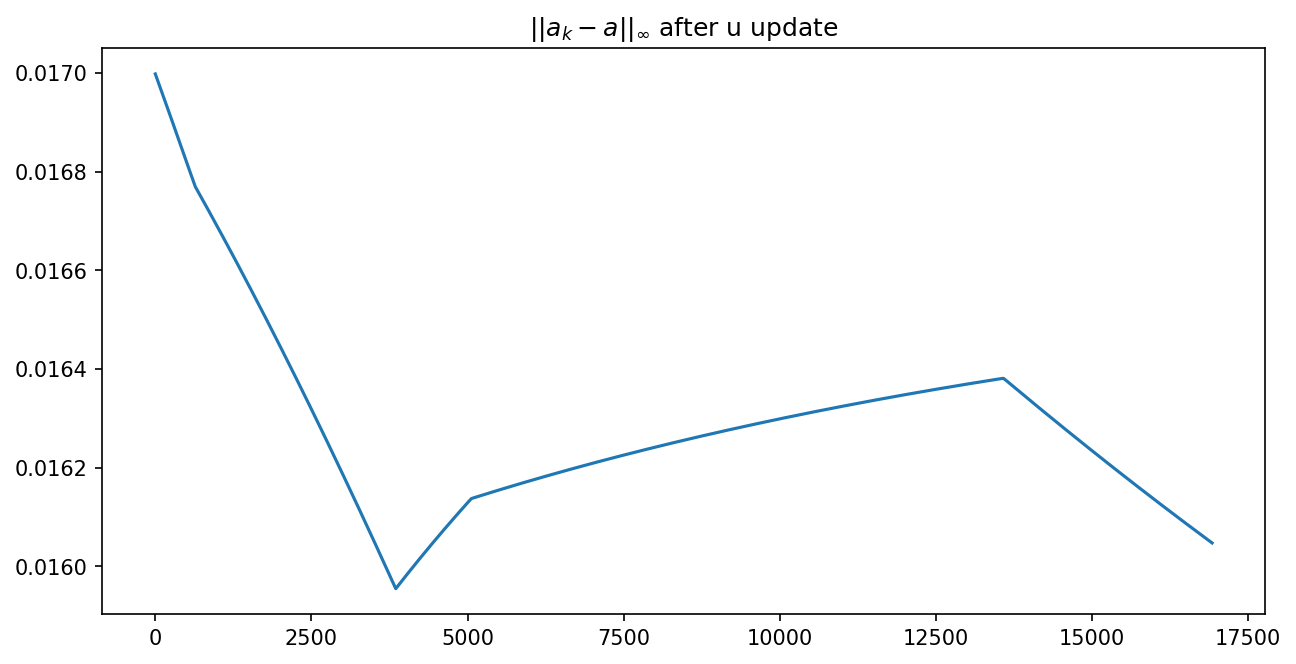

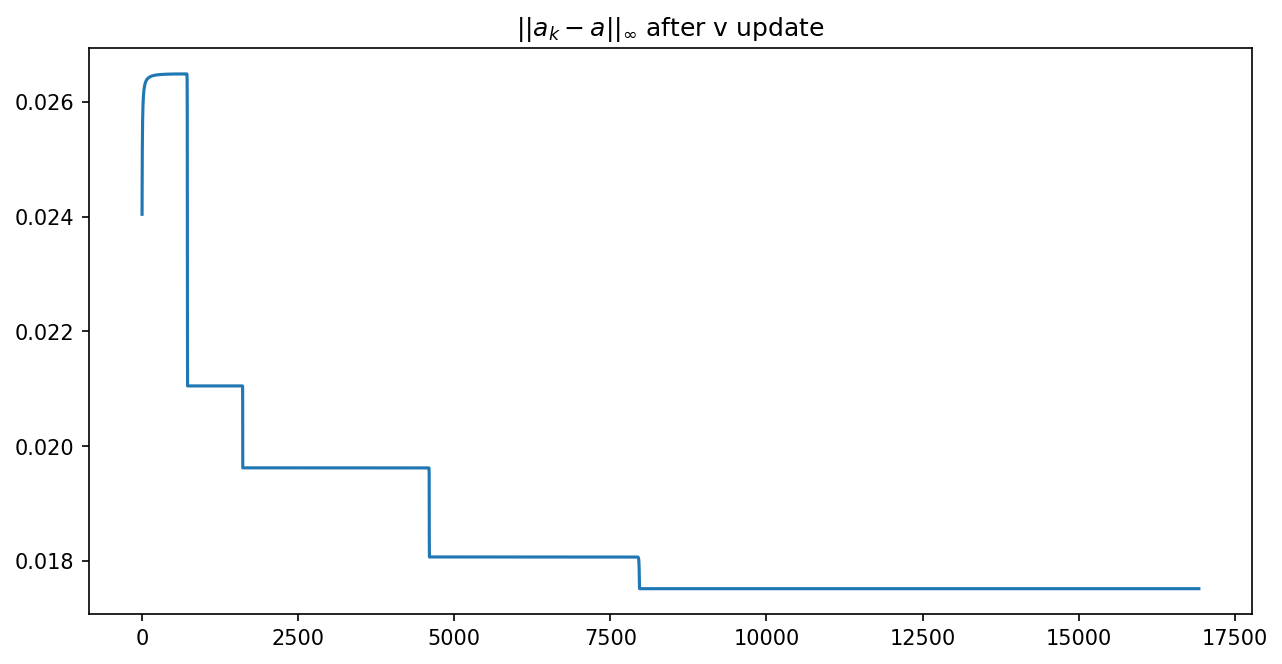

In [19]:
y = []

for uk, vk in zip(log['u'], log['v']):
    Xk = ersot.calc_B(uk, vk)
    ak = Xk.sum(-1)

    y.append(norm_inf(ak - ersot.a))

# Overview
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[1::2], label='After u update')
plt.plot(y[2::2], label='After v update')
plt.title('$||a_k - a||_\infty$')
plt.legend()
plt.show()

# Each u update
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[1::2])
plt.title('$||a_k - a||_\infty$ after u update')
plt.show()

# Each v update
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(y[2::2])
plt.title('$||a_k - a||_\infty$ after v update')
plt.show()